#Wine Prediction

Dataset obtained from:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [1]:
import os
os.chdir('/content/drive/MyDrive/ML/Wine')

In [ ]:
!pip install plotly --upgrade

     |████████████████████████████████| 25.3 MB 1.8 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

##Opening and analyzing the Dataframe

In [3]:
df_wine = pd.read_csv('winequality-red.csv')

In [4]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df_wine.shape

(1599, 12)

In [6]:
#checking for missing values
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

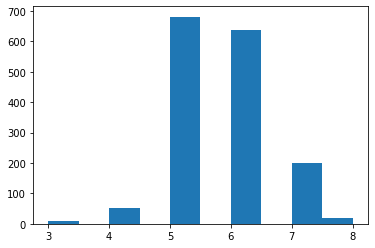

In [7]:
plt.hist(df_wine['quality'])

###Outlier detection

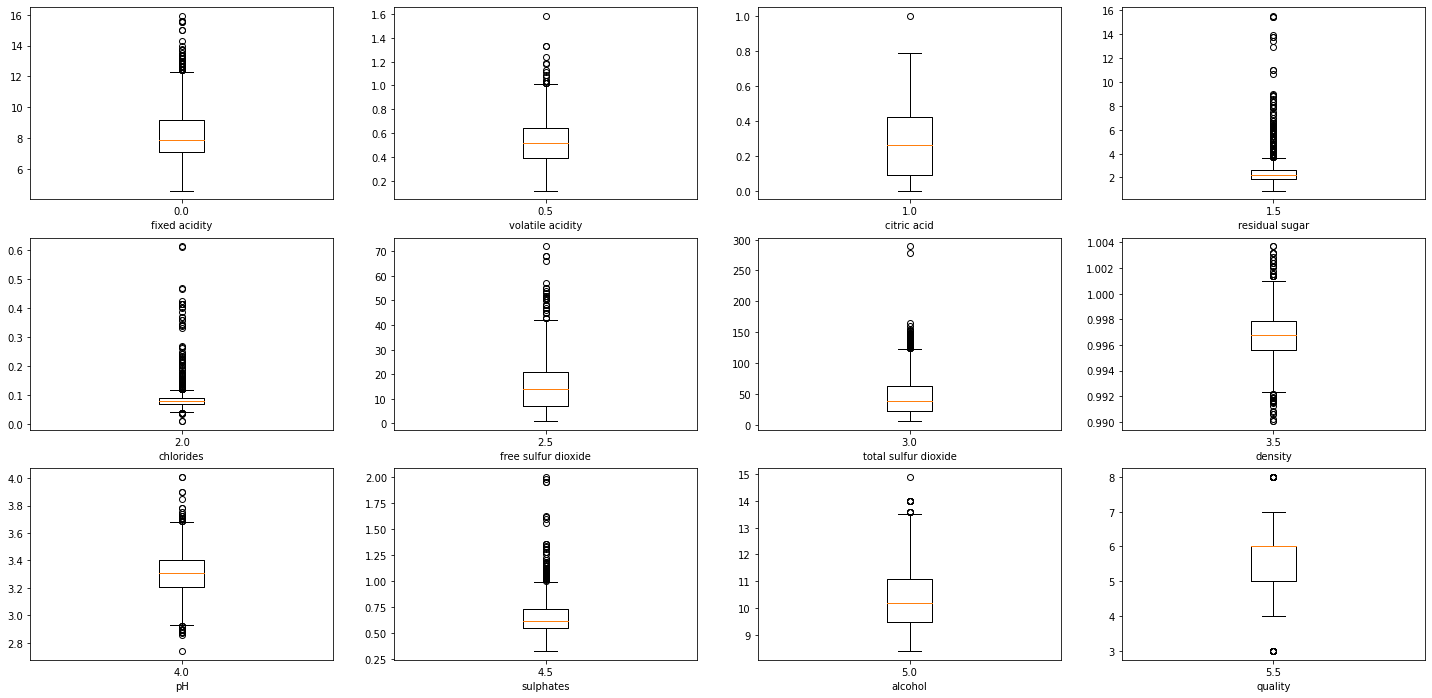

In [8]:
fig, ax = plt.subplots(3,4,figsize = [25,12])
col = df_wine.columns
for i in range(12):
  ax = plt.subplot(3,4,1+i)
  ax.boxplot(df_wine[col[i]],positions=[i/2])
  ax.set_xlabel(col[i])

  [0,1,3,4,5,6,7,8,9]

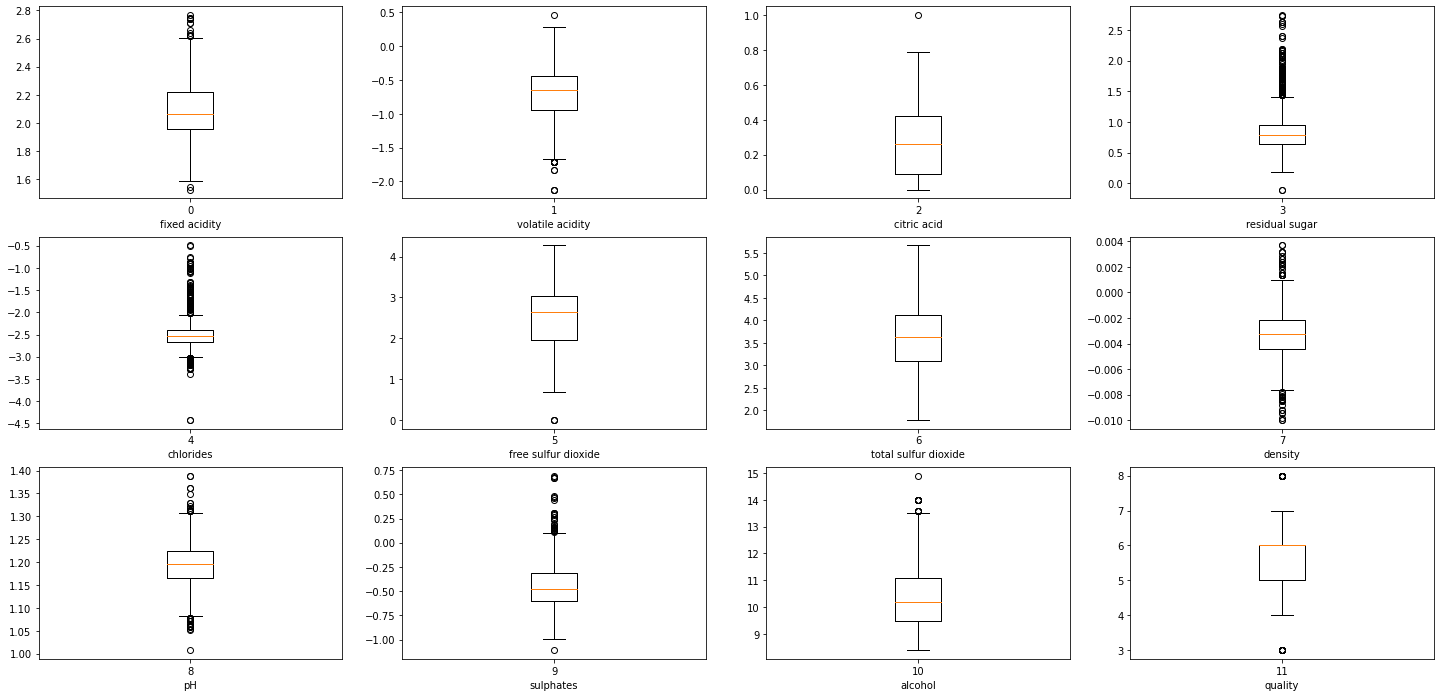

In [ ]:
fig, ax = plt.subplots(3,4,figsize = [25,12])
col = df_wine.columns
for i in range(12):
  ax = plt.subplot(3,4,1+i)
  if i in  [0,1,3,4,5,6,7,8,9]:
    ax.boxplot(np.log(df_wine[col[i]]),positions=[i])
  else:
    ax.boxplot(df_wine[col[i]],positions=[i])

  ax.set_xlabel(col[i])

In [ ]:
# Income x age
grafico = px.scatter_matrix(df_wine, dimensions = ['residual sugar','chlorides','sulphates'],color = 'quality')
grafico.show()

In [ ]:
#Scaling of data

#Data pre-processing

In [9]:
df_wine = pd.read_csv('winequality-red.csv')
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
X = df_wine.iloc[:,:-1].values
X.shape

(1599, 11)

In [11]:
colunas = df_wine.columns[:-1]
colunas

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

##if quality > 7 : 1 else: 0

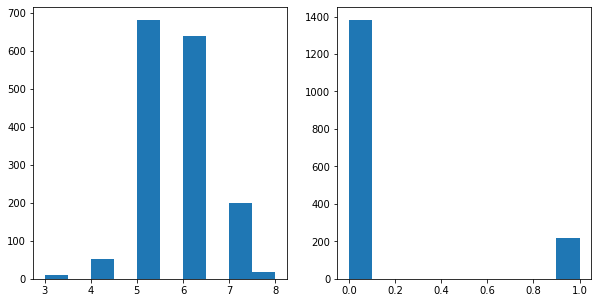

In [12]:
fig, ax = plt.subplots(1,2, figsize=[10,5])
ax = plt.subplot(1,2,1)

df_wine = pd.read_csv('winequality-red.csv')
ax.hist(df_wine.iloc[:,11].values)
y = df_wine.iloc[:,11].values
y[y < 7]  = 0
y[y >= 7]  = 1

ax = plt.subplot(1,2,2)
ax.hist(y, bins =10)

df_wine.at[:,'quality'] = y

##Remove atributes

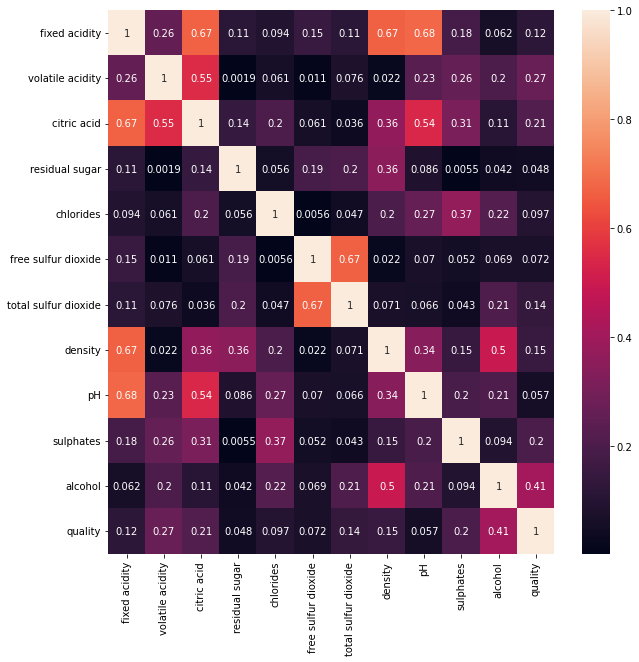

In [13]:
figura = plt.figure(figsize=(10,10))
sns.heatmap(abs(df_wine.corr()), annot=True);

Remove 

In [16]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
X = df_wine.iloc[:,:-1].values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

In [17]:
selecao = VarianceThreshold(threshold=0.01)
X_variancia = selecao.fit_transform(X_scaler)
X_variancia.shape

(1599, 9)

In [18]:
indices = np.where(selecao.variances_ > 0.01)
indices

(array([ 0,  1,  2,  5,  6,  7,  8,  9, 10]),)

In [19]:
colunas[[3,4]]

Index(['residual sugar', 'chlorides'], dtype='object')

In [20]:
df_variancia = df_wine.drop(columns = ['residual sugar', 'chlorides'], axis = 1)
df_variancia

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [ ]:
X = df_variancia.iloc[:,:-1].values
X.shape

(1599, 9)

##Dados desbalanceados

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, y)

In [23]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1382,  217]))

In [24]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([1382, 1382]))

##Scaling of data

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

##Division between train and test

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.25, random_state = 0)

In [29]:
X_train

array([[ 7.44748723,  0.31169459,  0.35694586, ...,  3.2318621 ,
         0.62558631, 12.34748723],
       [ 7.8       ,  0.34      ,  0.37      , ...,  3.34      ,
         0.59      ,  9.4       ],
       [10.        ,  0.38      ,  0.38      , ...,  3.15      ,
         0.65      ,  8.5       ],
       ...,
       [ 7.86379273,  0.46034401,  0.37620727, ...,  3.24706945,
         0.74172436, 12.33964738],
       [ 7.37814781,  0.43431201,  0.21884896, ...,  3.42959977,
         0.71890739, 12.8       ],
       [ 8.15845824,  0.29347752,  0.37550749, ...,  3.27      ,
         0.6278758 , 11.87199142]])

#Classification

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

##Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [33]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_over, y_over)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

In [34]:
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.8708447991194277


##Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [42]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_over, y_over)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

In [43]:
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
0.9062989752863171


##KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [80]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_over, y_over)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

In [81]:
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 3, 'p': 1}
0.8758989176297927


##Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [ ]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_over, y_over)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

In [85]:
print(melhores_parametros)
print(melhor_resultado)

{'C': 2.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.8068047802500196


##SVM

In [86]:
from sklearn.svm import SVC

In [87]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [88]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_over, y_over)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

In [89]:
print(melhores_parametros)
print(melhor_resultado)

{'C': 2.0, 'kernel': 'linear', 'tol': 0.001}
0.80824553817124


#Cross Validation

In [56]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []


for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    
    arvore = DecisionTreeClassifier(criterion='entropy',min_samples_leaf = 1, min_samples_split = 2, splitter = 'best')
    score = cross_val_score(arvore, X_over, y_over, cv = kfold)
    resultados_arvore.append(score.mean())

    random_forest = RandomForestClassifier(criterion='gini',min_samples_leaf = 1, min_samples_split = 2, n_estimators= 10)
    scores = cross_val_score(random_forest, X_over, y_over, cv = kfold)
    resultados_random_forest.append(scores.mean())

    knn = KNeighborsClassifier(n_neighbors = 3, p = 1)
    scores = cross_val_score(knn, X_over, y_over, cv = kfold)
    resultados_knn.append(scores.mean())

    logistica = LogisticRegression(C = 2, solver ='lbfgs', tol = 0.0001)
    scores = cross_val_score(logistica, X_over, y_over, cv = kfold)
    resultados_logistica.append(scores.mean())

    svm = SVC(C = 2, kernel = 'linear', tol = 0.001)
    scores = cross_val_score(svm, X_over, y_over, cv = kfold)
    resultados_svm.append(scores.mean())



In [91]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm})

In [92]:
resultados.describe()

,Arvore,Random forest,KNN,Logistica,SVM
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.905426,0.934913,0.906922,0.816640,0.822347
std,0.003587,0.003646,0.002137,0.001508,0.001445
min,0.898697,0.928342,0.901949,0.813284,0.818385
25%,0.903134,0.931715,0.905579,0.815842,0.821626
50%,0.905388,0.935235,0.906851,0.816549,0.822693
75%,0.907029,0.937681,0.908466,0.817558,0.823100
max,0.915339,0.941405,0.911376,0.820198,0.824519


##Teste de Normalidade

In [93]:
from scipy.stats import shapiro

alpha = 0.05
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm)


((0.9660348296165466, 0.4370996057987213),
 (0.9678364992141724, 0.48180222511291504),
 (0.9876880645751953, 0.9738052487373352),
 (0.9660788774490356, 0.43815717101097107),
 (0.9380630850791931, 0.08067148923873901))

## Teste de hipótese com ANOVA e Tukey

In [94]:
from scipy.stats import f_oneway

In [95]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm)
p

6.704605453331077e-183

In [96]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Resultados são iguais')

Hipótese nula rejeitada. Dados são diferentes


In [97]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore', 
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest', 
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn', 
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm']}

In [98]:
resultados_df = pd.DataFrame(resultados_algoritmos)

In [99]:
from statsmodels.stats.multicomp import MultiComparison

compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn   0.0015 0.1905 -0.0004  0.0034  False
       arvore     logistica  -0.0888  0.001 -0.0907 -0.0869   True
       arvore random_forest   0.0295  0.001  0.0276  0.0314   True
       arvore           svm  -0.0831  0.001  -0.085 -0.0812   True
          knn     logistica  -0.0903  0.001 -0.0922 -0.0884   True
          knn random_forest    0.028  0.001  0.0261  0.0299   True
          knn           svm  -0.0846  0.001 -0.0865 -0.0827   True
    logistica random_forest   0.1183  0.001  0.1164  0.1202   True
    logistica           svm   0.0057  0.001  0.0038  0.0076   True
random_forest           svm  -0.1126  0.001 -0.1145 -0.1107   True
------------------------------------------------------------------


In [103]:
resultados.describe()

,Arvore,Random forest,KNN,Logistica,SVM
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.905426,0.934913,0.906922,0.816640,0.822347
std,0.003587,0.003646,0.002137,0.001508,0.001445
min,0.898697,0.928342,0.901949,0.813284,0.818385
25%,0.903134,0.931715,0.905579,0.815842,0.821626
50%,0.905388,0.935235,0.906851,0.816549,0.822693
75%,0.907029,0.937681,0.908466,0.817558,0.823100
max,0.915339,0.941405,0.911376,0.820198,0.824519


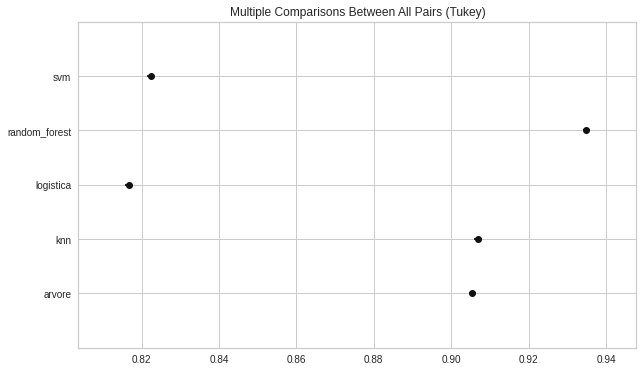

In [101]:
teste_estatistico.plot_simultaneous();

#Saving Classifier

In [106]:
random_forest = RandomForestClassifier(criterion='gini',min_samples_leaf = 1, min_samples_split = 2, n_estimators= 10)
random_forest.fit(X_over,y_over)

import pickle
pickle.dump(random_forest, open('random_forest_finalizado.sav', 'wb'))